In [1]:
import pandas as pd
import numpy as np

names= ['sepal_length', 'sepal_width', 'petal_length','petal_width','target']

iris = pd.read_csv('data/iris.csv',sep=',', decimal='.', header=None,names=names)


In [2]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [6]:
Y = iris['target']
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

In [7]:
X = iris[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [8]:
print (type(X.shape),X.shape)
print (type(Y.shape),Y.shape)


<class 'tuple'> (150, 2)
<class 'tuple'> (150,)


## Data preprocessing

In [9]:
mask_feature = iris['sepal_length'] > 6.0
mask_feature.head()

0    False
1    False
2    False
3    False
4    False
Name: sepal_length, dtype: bool

### Substitute the setosa target label with the New label label

In [10]:
mask_target = iris['target'] == 'setosa'
iris.loc[mask_target, 'target'] = 'New label'
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,New label
1,4.9,3.0,1.4,0.2,New label
2,4.7,3.2,1.3,0.2,New label
3,4.6,3.1,1.5,0.2,New label
4,5.0,3.6,1.4,0.2,New label


In [11]:
iris['target'].unique()

array(['New label', 'versicolor', 'virginica'], dtype=object)

In [12]:
grouped_targets_mean = iris.groupby(['target']).mean()
grouped_targets_mean

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
New label,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [13]:
grouped_targets_var = iris.groupby(['target']).var()
grouped_targets_var

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
New label,0.124249,0.145180,0.030106,0.011494
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [14]:
iris.sort_values(by='sepal_length').head()

,sepal_length,sepal_width,petal_length,petal_width,target
13,4.3,3.0,1.1,0.1,New label
42,4.4,3.2,1.3,0.2,New label
38,4.4,3.0,1.3,0.2,New label
8,4.4,2.9,1.4,0.2,New label
41,4.5,2.3,1.3,0.3,New label


In [15]:
iris.apply(np.count_nonzero, axis=1).head()

0    5
1    5
2    5
3    5
4    5
dtype: int64

In [16]:
iris.apply(np.count_nonzero, axis=0)

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
target          150
dtype: int64

In [17]:
iris.applymap(lambda el:len(str(el))).head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,3,3,3,3,9
1,3,3,3,3,9
2,3,3,3,3,9
3,3,3,3,3,9
4,3,3,3,3,9


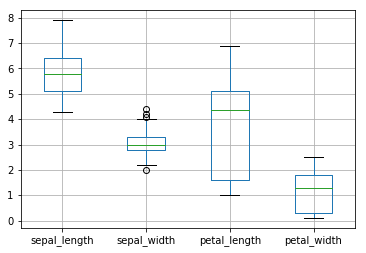

In [5]:
boxes = iris.boxplot(return_type='axes')
boxes

In [7]:
iris.quantile([0.1, 0.99])

,sepal_length,sepal_width,petal_length,petal_width
0.10,4.8,2.500,1.4,0.2
0.99,7.7,4.151,6.7,2.5


In [9]:
pd.crosstab(iris['petal_length'] > 3.758667, iris['petal_width']> 1.198667)

petal_width,False,True
petal_length,,
False,56,1
True,4,89


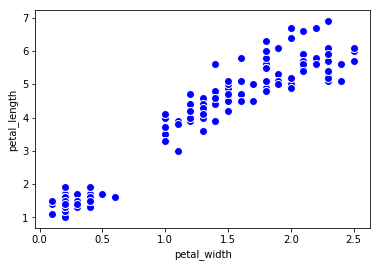

In [12]:
scatterplot = iris.plot(kind='scatter', x='petal_width',y='petal_length', s=64, c='blue', edgecolors='white')
scatterplot

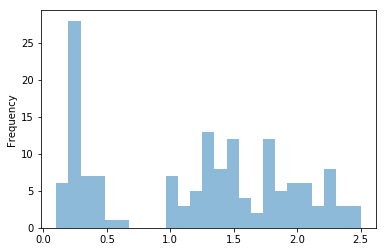

In [15]:
distr = iris.petal_width.plot(kind='hist', alpha=0.5, bins=25)
distr